In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import pandas as pd

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

SEED = 1


df = pd.read_csv("abalone.csv")
df['Sex'] = df['Sex'].map(lambda x: 1 if x =='M' else (-1 if x == 'F' else 0))
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
X = df.drop(['Rings'], axis=1).values
y = df['Rings'].values

In [1]:
def write2file(num, filename):
    with open(filename, 'w') as f:
        f.write(f"{num}")

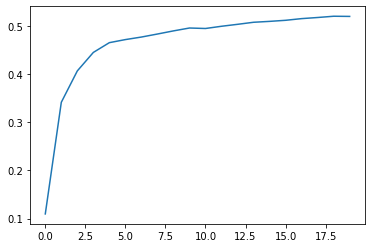

In [10]:
kf = KFold(n_splits=5, shuffle=True, random_state=SEED)
max_score = -1
k_min = 0
acc = []
for k in range(1, 51):
    score = cross_val_score(RandomForestRegressor(n_estimators=k, random_state=SEED), X, y, scoring="r2", cv=kf)
    score = np.mean(score)
    if round(score, 3) > 0.52:
        k_min = k
        break
    acc.append(score)
    
plt.plot(acc)
write2file(k_min, '1.txt')

# уменьшается ли качество на валидации при добавлении деревьев?

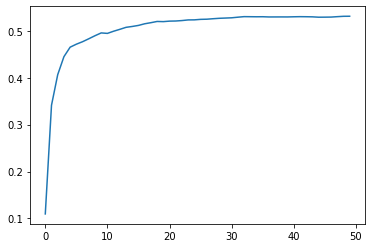

In [11]:
kf = KFold(n_splits=5, shuffle=True, random_state=SEED)
max_score = -1
k_min = 0
acc = []
for k in range(1, 51):
    score = cross_val_score(RandomForestRegressor(n_estimators=k, random_state=SEED), X, y, scoring="r2", cv=kf)
    score = np.mean(score)
    acc.append(score)
    
plt.plot(acc)